# Modeling

In [61]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

pd.set_option('display.max_colwidth', None)

In [62]:
plants = pd.read_csv('../data/data_cleaned/plants.csv')

In [63]:
plants.head()

,id,created_utc,title,self_text,comments,score,upvote_ratio,subreddit
0,uw3f46,1.653321e+09,I feel attacked.,no_text,793,63651,0.94,1
1,v4z9xu,1.654380e+09,The liberals are trying to make my plants gay!!,no_text,1281,54217,0.82,1
2,q0hqvn,1.633268e+09,This was supposed to be a plant progress post showing off my oxalis but Henk stole the show,no_text,572,45198,0.96,1
3,i5rplr,1.596855e+09,My grandpa made me a plant stand 💖,no_text,451,40218,0.96,1
4,lkjvss,1.613414e+09,I let my Golden Pothos get outta hand for just this reason. It’s like a little jungle for him.,no_text,593,39723,0.98,1


In [64]:
plants.shape

(9271, 8)

In [65]:
X = plants['title']
y = plants['subreddit']

In [66]:
X.shape

(9271,)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [68]:
X_train.shape

(6953,)

In [69]:
cvec = CountVectorizer(
    max_features=5_000,
    min_df=2,
    max_df=.9,
    ngram_range=(1, 2),
    stop_words='english'
)

In [70]:
cvec.fit(X_train)

CountVectorizer(max_df=0.9, max_features=5000, min_df=2, ngram_range=(1, 2),
                stop_words='english')

In [71]:
X_train_cvec = cvec.transform(X_train)

In [72]:
cvec.get_feature_names_out()

array(['00 did', '000', '10', ..., 'zz plant', 'zz plants', 'zz raven'],
      dtype=object)

In [73]:
X_train_cvec

<6953x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 38257 stored elements in Compressed Sparse Row format>

In [74]:
X_train_df = pd.DataFrame(X_train_cvec.todense(), columns=cvec.get_feature_names_out())

In [75]:
X_train_df.head()

,00 did,000,10,10 bucks,10 croc,10 facebook,10 feet,10 months,10 year,10 years,...,zone 8b,zone 9b,zoom,zucchini,zucchini huge,zz,zz growth,zz plant,zz plants,zz raven
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

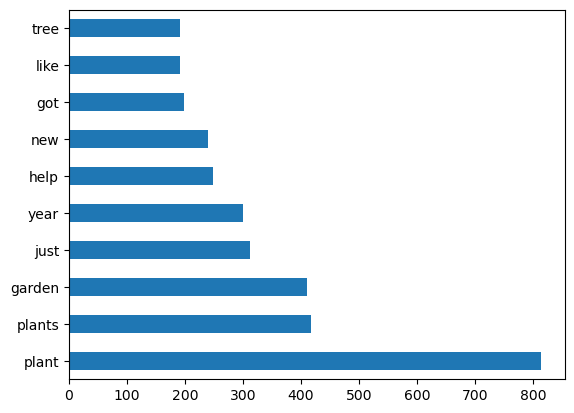

In [76]:
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh')

In [77]:
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])

In [78]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer(stop_words='english')),
                ('nb', MultinomialNB())])

In [79]:
pipe.score(X_train, y_train)

0.9150007191140515

In [80]:
pipe.score(X_test, y_test)

0.8295944779982743

In [81]:
1 - y.mean()

0.4891597454427785

In [82]:
pipe.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer(stop_words='english')),
  ('nb', MultinomialNB())],
 'verbose': False,
 'cvec': CountVectorizer(stop_words='english'),
 'nb': MultinomialNB(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': 'english',
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'nb__alpha': 1.0,
 'nb__class_prior': None,
 'nb__fit_prior': True,
 'nb__force_alpha': 'warn'}

In [83]:
pipe_params = {
    'cvec__max_features': [5_000],
    'cvec__min_df': [2],
    'cvec__max_df': [.9],
    'cvec__ngram_range': [(1, 2)]
}

In [84]:
gs = GridSearchCV(pipe,
                  param_grid = pipe_params,
                  cv = 5)

In [85]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.9], 'cvec__max_features': [5000],
                         'cvec__min_df': [2], 'cvec__ngram_range': [(1, 2)]})

In [86]:
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 5000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}

In [87]:
gs.score(X_train, y_train)

0.8940025888105854

In [88]:
gs.score(X_test, y_test)

0.8291630716134599

In [89]:
preds = gs.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

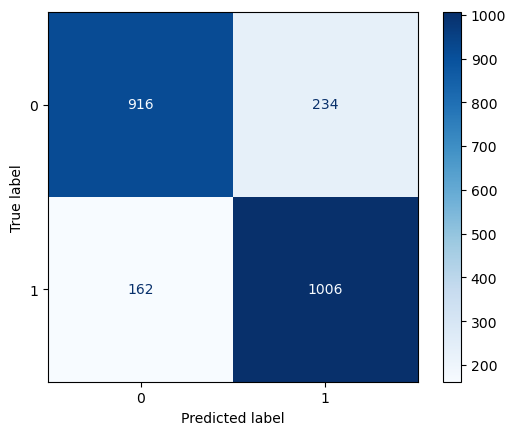

In [90]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test, cmap='Blues');

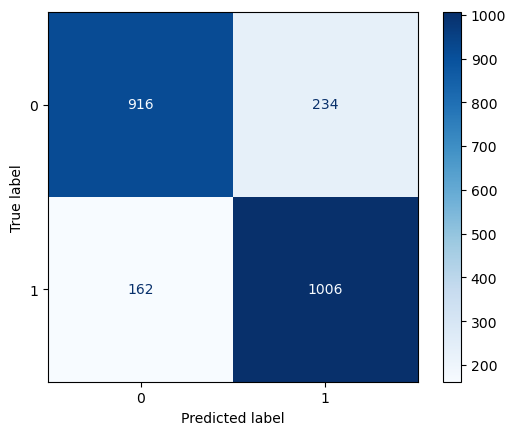

In [91]:
ConfusionMatrixDisplay.from_predictions(y_test, preds, cmap='Blues');

In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds, digits = 5))

              precision    recall  f1-score   support

           0    0.84972   0.79652   0.82226      1150
           1    0.81129   0.86130   0.83555      1168

    accuracy                        0.82916      2318
   macro avg    0.83051   0.82891   0.82891      2318
weighted avg    0.83036   0.82916   0.82896      2318



In [93]:
misclassified_indices = (preds != y_test)

In [94]:
misclassified_indices

5799    False
3599     True
4819    False
966     False
448     False
        ...  
4215    False
4852     True
4618    False
1474    False
6695     True
Name: subreddit, Length: 2318, dtype: bool

In [95]:
misclassified_df = pd.DataFrame({
    'Misclassified_Posts': X_test[misclassified_indices],
    'True Labels': y_test[misclassified_indices],
    'Predicted_Labels': preds[misclassified_indices]
})

In [97]:
misclassified_df.head(50)

,Misclassified_Posts,True Labels,Predicted_Labels
3599,Any idea what this is ?,1,0
3812,Suggestions…,1,0
6600,so proud of my babies...,0,1
4676,this is what it looks like when i’m about to pull plants out of my neighbors compost bin,1,0
5622,ain’t stupid if it works,0,1
2378,Stromanthe is popping with colour 😍,1,0
5030,Thought this sub would appreciate this post,0,1
7755,Renting my house so can’t plant in-ground. Tried baby leaf lettuce in 4 inch pots.,0,1
6682,"I just started to learn to prune, how is it ? Any thoughts on improvements?",0,1
5713,Social distancing in my safe room.,0,1
